In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('CleanedData.csv')
df=df.drop(df.columns[1:14],axis=1)
df=df.drop(df.columns[[1,3,4]],axis=1)
df.head()


,time,total load actual,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,...,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia,fossil total,hydro total
0,2014-12-31 23:00:00+00:00,25385.0,281.625,281.625,281.625,1035.0,100,7,58,0.0,...,270.475,1001.0,77,1.0,62,0.0,0.0,0,10156.0,3813.0
1,2015-01-01 00:00:00+00:00,24382.0,281.625,281.625,281.625,1035.0,100,7,58,0.0,...,270.475,1001.0,77,1.0,62,0.0,0.0,0,10437.0,3587.0
2,2015-01-01 01:00:00+00:00,22734.0,281.286,281.286,281.286,1036.0,100,7,48,0.0,...,269.686,1002.0,78,0.0,23,0.0,0.0,0,9918.0,3508.0
3,2015-01-01 02:00:00+00:00,21286.0,281.286,281.286,281.286,1036.0,100,7,48,0.0,...,269.686,1002.0,78,0.0,23,0.0,0.0,0,8859.0,3231.0
4,2015-01-01 03:00:00+00:00,20264.0,281.286,281.286,281.286,1036.0,100,7,48,0.0,...,269.686,1002.0,78,0.0,23,0.0,0.0,0,8313.0,3499.0


In [3]:

#df['time'] = pd.to_datetime(df['time'])
#df = df.set_index('time')
hourtime=list()
day=list()
t=23
d=1
for i in range(0,35065):
    if(t>=24):
        t=0
    if(d>7):
        d=1
    hourtime.append(t)
    day.append(d)
    t=t+1
    d=d+1
#df['month'] = df['time'].dt.month
df['month_number'] = pd.to_datetime(df['time']).dt.month
df['year_no']=pd.to_datetime(df['time']).dt.year
df['time']=pd.Series(hourtime)
df['dayno']=pd.Series(day)
df


,time,total load actual,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,...,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia,fossil total,hydro total,month_number,year_no,dayno
0,23,25385.0,281.625,281.625,281.625,1035.0,100,7,58,0.0,...,1.0,62,0.0,0.0,0,10156.0,3813.0,12,2014,1
1,0,24382.0,281.625,281.625,281.625,1035.0,100,7,58,0.0,...,1.0,62,0.0,0.0,0,10437.0,3587.0,1,2015,2
2,1,22734.0,281.286,281.286,281.286,1036.0,100,7,48,0.0,...,0.0,23,0.0,0.0,0,9918.0,3508.0,1,2015,3
3,2,21286.0,281.286,281.286,281.286,1036.0,100,7,48,0.0,...,0.0,23,0.0,0.0,0,8859.0,3231.0,1,2015,4
4,3,20264.0,281.286,281.286,281.286,1036.0,100,7,48,0.0,...,0.0,23,0.0,0.0,0,8313.0,3499.0,1,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,18,30653.0,284.130,282.150,286.150,1027.0,71,1,250,0.0,...,2.0,140,0.0,0.0,0,10440.0,5972.0,12,2018,4
35060,19,29735.0,282.640,281.150,284.150,1027.0,62,3,270,0.0,...,1.0,242,0.0,0.0,0,9981.0,5104.0,12,2018,5
35061,20,28071.0,282.140,280.150,284.150,1028.0,53,4,300,0.0,...,3.0,300,0.0,0.0,0,9615.0,4029.0,12,2018,6
35062,21,25801.0,281.130,278.150,284.150,1028.0,50,5,320,0.0,...,2.0,310,0.0,0.0,0,9018.0,3304.0,12,2018,7


In [4]:


X = df.drop(columns = ['total load actual'])
y = df['total load actual']



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=2)
from sklearn.metrics import mean_squared_error, mean_absolute_error
#timecolumn.head()

In [6]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#_train_scaler = scaler.fit_transform(X_train)
#_test_scaler = scaler.transform(X_test)


In [7]:


from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline 
lin = LinearRegression()



In [8]:

degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())


model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


y_pred_dat=pd.DataFrame()
y_pred_dat['predicted']=y_test_pred


rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)


mape_train = 100 * mean_absolute_error(y_train, y_train_pred) / np.mean(np.abs(y_train))
mape_test = 100 * mean_absolute_error(y_test, y_test_pred) / np.mean(np.abs(y_test))


print(f'RMSE on training set: {rmse_train}')
print(f'RMSE on test set: {rmse_test}')

print(f'MAPE on training set: {mape_train:.5f}%')
print(f'MAPE on test set: {mape_test:.5f}%')




RMSE on training set: 2093.3286703930803
RMSE on test set: 2219.4192555695176
MAPE on training set: 5.72353%
MAPE on test set: 6.03862%


In [9]:
y_pred_dat.index=y_test.index
y_pred_dat['actual']=y_test
y_pred_dat=y_pred_dat.sort_index()
y_pred_dat['time']=pd.Series(df['time'],index=y_pred_dat.index)
y_pred_dat['year']=pd.Series(df['year_no'],index=y_pred_dat.index)
y_pred_dat


,predicted,actual,time,year
0,22304.733149,25385.0,23,2014
1,22621.826405,24382.0,0,2015
2,23407.607869,22734.0,1,2015
11,27261.354454,23547.0,10,2015
17,28090.286664,23606.0,16,2015
...,...,...,...,...
35038,27766.910572,29145.0,21,2018
35043,21239.999982,20200.0,2,2018
35053,29611.511132,28636.0,12,2018
35055,28319.556530,27009.0,14,2018


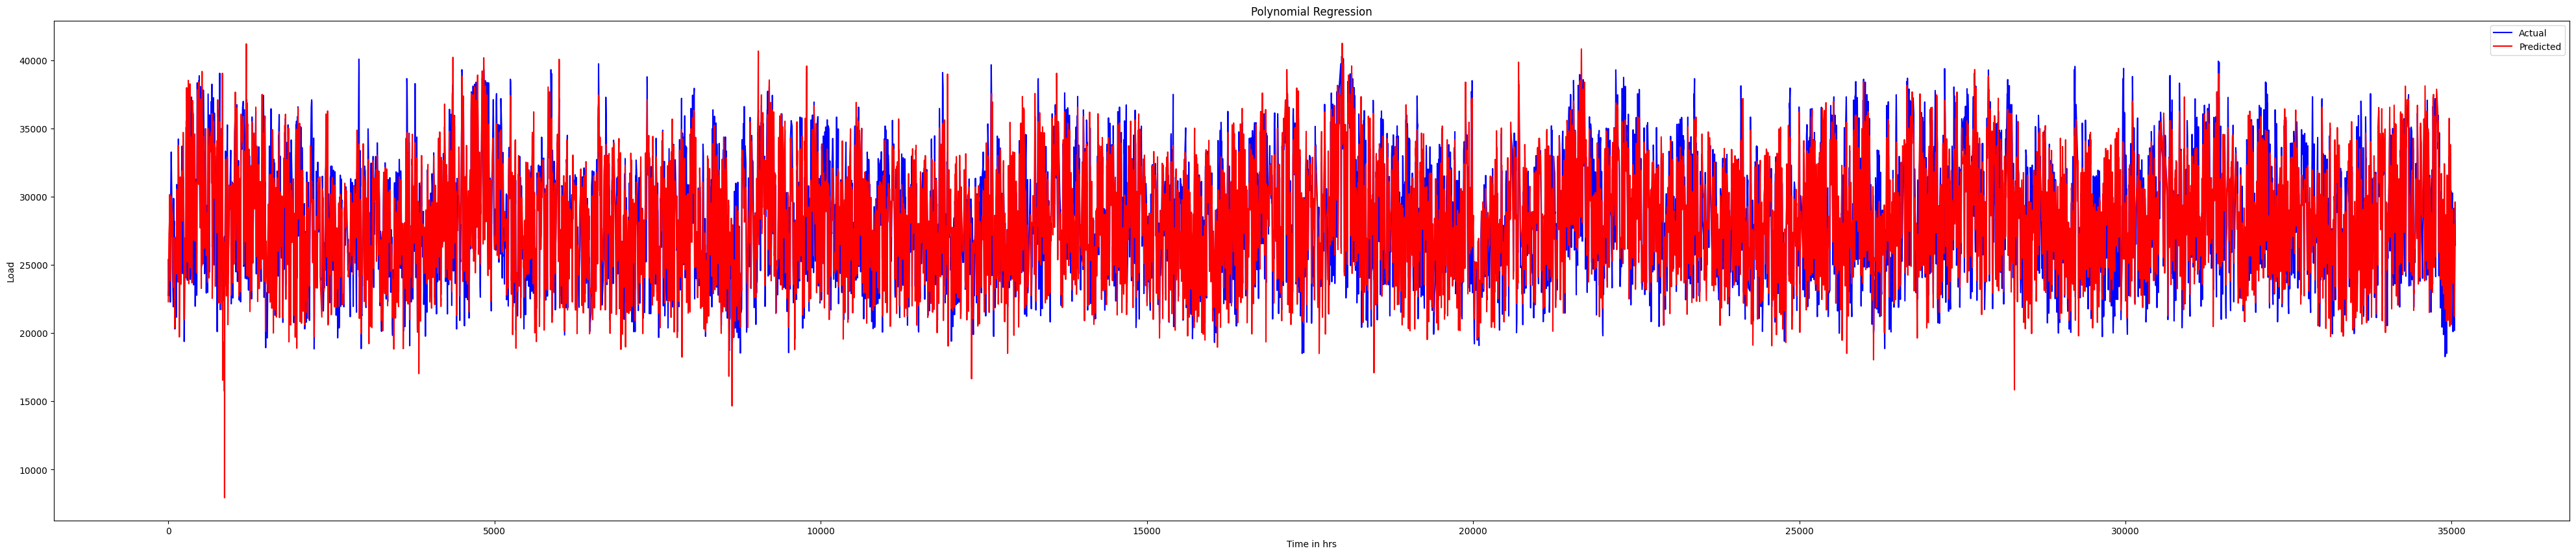

In [10]:
time=y_pred_dat['time']
pred=y_pred_dat['predicted']
test=y_pred_dat['actual']
plt.figure(figsize=(50,10))
plt.plot(y_pred_dat.index,test,color='b',label='Actual')
plt.plot(y_pred_dat.index,pred,color='r',label='Predicted')
plt.title('Polynomial Regression')
plt.xlabel('Time in hrs')
plt.ylabel('Load')
plt.legend()
